## Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape #class of the picture

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

## Visualize data

[4]


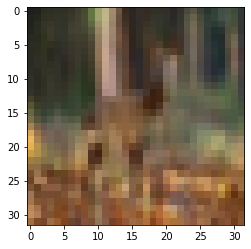

In [7]:
i = 30008 #index
plt.imshow(X_train[i])
print(y_train[i]) #class 4 i.e deer

### Visualize multible pictures

/Users/jeeveshdhingra/ML/env/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


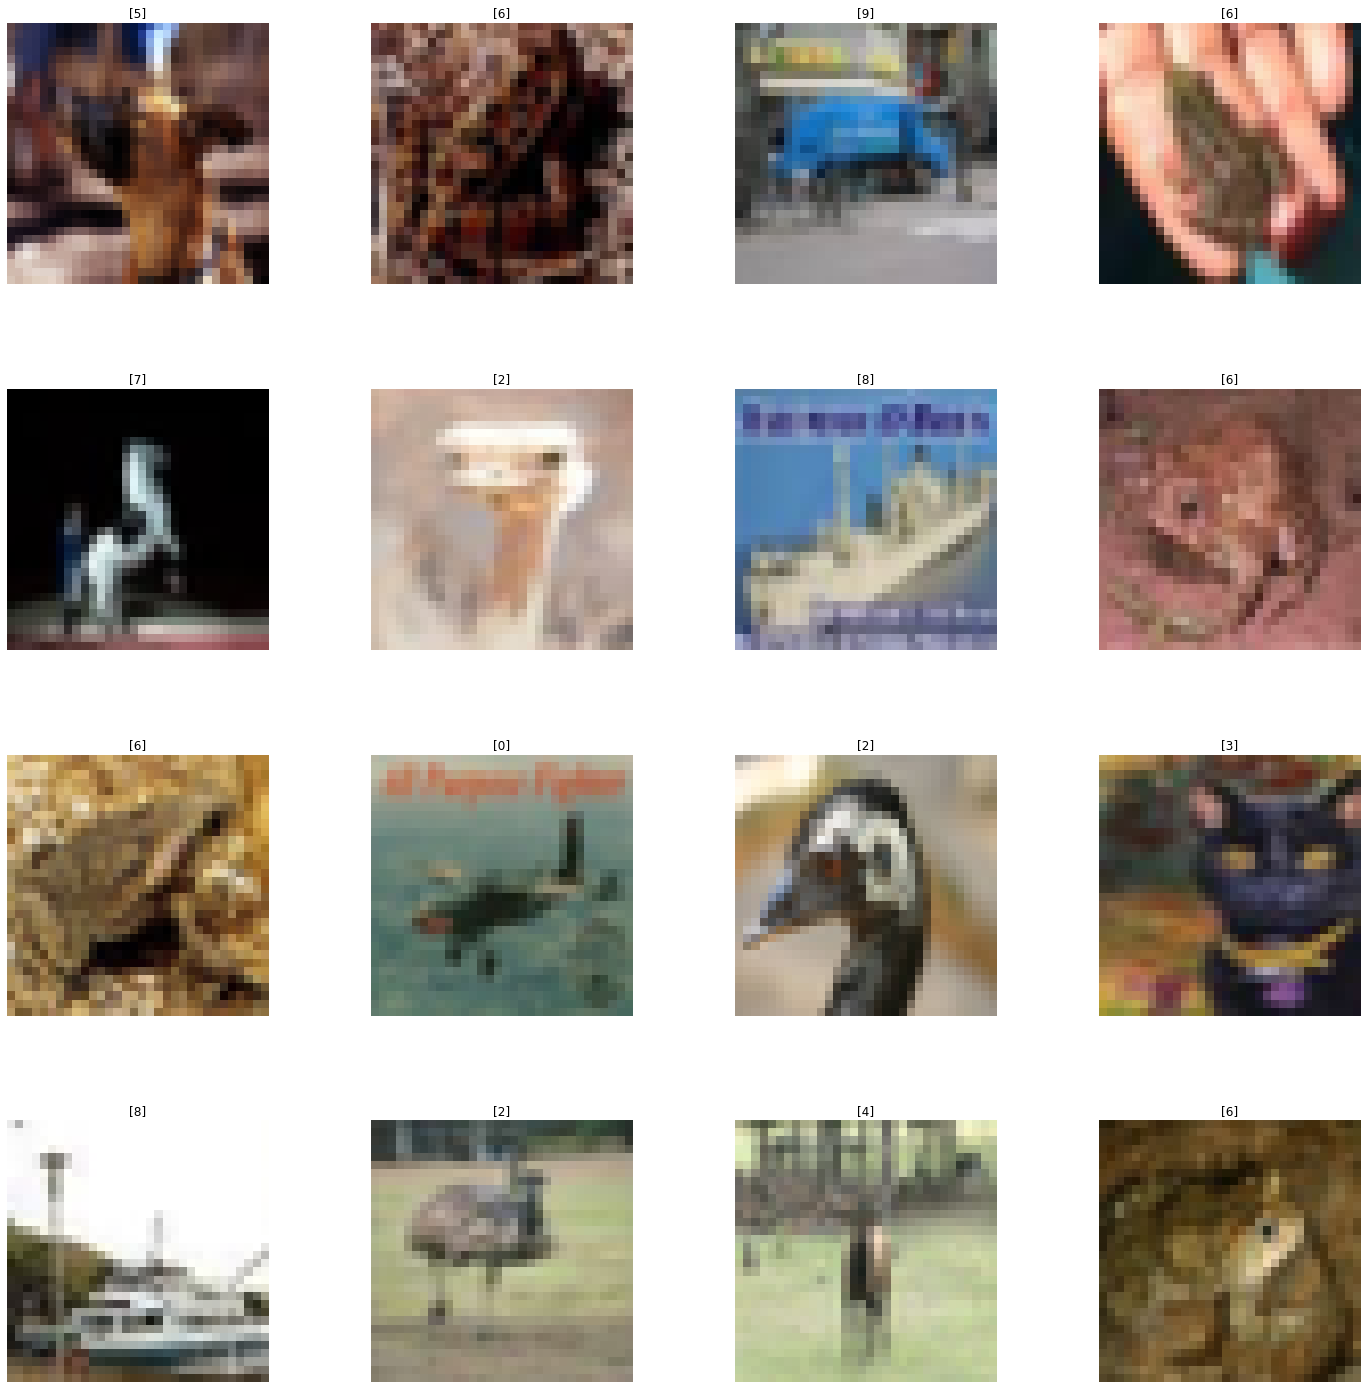

In [8]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel() #used to flatten the matrix

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid): # creates an array from 0 to L_grid*W_grid
    index = np.random.randint(0, n_training) # pick a random number from 0 to len(X_train)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index]) # gives the label
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4) #spacing between the images

## Data Preprocessing

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
number_cat = 10 # number of categories or classes

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
import keras
y_train = to_categorical(y_train, number_cat)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test = to_categorical(y_test, number_cat)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [17]:
X_train = X_train/255
X_test = X_test/255


In [18]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [19]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
Input_shape = X_train.shape[1:]

In [21]:
Input_shape 

(32, 32, 3)

## Building the CNN

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
from tensorflow.keras import optimizers
import tensorflow as tf

In [23]:
reg=None
adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0.3

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=reg, input_shape=(Input_shape),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3), activation='relu',kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*32, (3, 3), activation='relu',kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*32, (3, 3), activation='relu',kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*32, (3, 3), activation='relu',kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*32, (3, 3), activation='relu',kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation='relu',kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)

/Users/jeeveshdhingra/ML/env/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-01-21 16:42:11.157284: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-21 16:42:11.157598: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


## Training the CNN

In [24]:
history=model.fit(X_train, y_train, batch_size=128, epochs=10)

2022-01-21 16:42:12.404560: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2022-01-21 16:42:12.751344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 25s 53ms/step - loss: 1.7299 - accuracy: 0.4354
Epoch 2/10
391/391 [==============================] - 19s 49ms/step - loss: 1.1161 - accuracy: 0.6048
Epoch 3/10
391/391 [==============================] - 19s 49ms/step - loss: 0.9161 - accuracy: 0.6746
Epoch 4/10
391/391 [==============================] - 19s 48ms/step - loss: 0.8040 - accuracy: 0.7151
Epoch 5/10
391/391 [==============================] - 19s 49ms/step - loss: 0.7244 - accuracy: 0.7449
Epoch 6/10
391/391 [==============================] - 19s 49ms/step - loss: 0.6685 - accuracy: 0.7636
Epoch 7/10
391/391 [==============================] - 19s 48ms/step - loss: 0.6178 - accuracy: 0.7816
Epoch 8/10
391/391 [==============================] - 19s 49ms/step - loss: 0.5747 - accuracy: 0.7997
Epoch 9/10
391/391 [==============================] - 19s 48ms/step - loss: 0.5312 - accuracy: 0.8127
Epoch 10/10
391/391 [==============================] - 19s 48ms/step - loss: 0.5064 - accurac

## Evaluating the model

In [25]:
evaluation = model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

2022-01-21 16:45:28.575021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 10ms/step - loss: 0.5487 - accuracy: 0.8171
Test Accuracy: 0.8171000480651855


In [26]:
predicted_classes = model.predict(X_test) 
classes_x=np.argmax(predicted_classes,axis=1)

2022-01-21 16:45:32.196600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [27]:
classes_x

array([3, 8, 8, ..., 5, 1, 7])

In [28]:
y_test = y_test.argmax(1) #go back from binary to numbers
y_test

array([3, 8, 8, ..., 5, 1, 7])

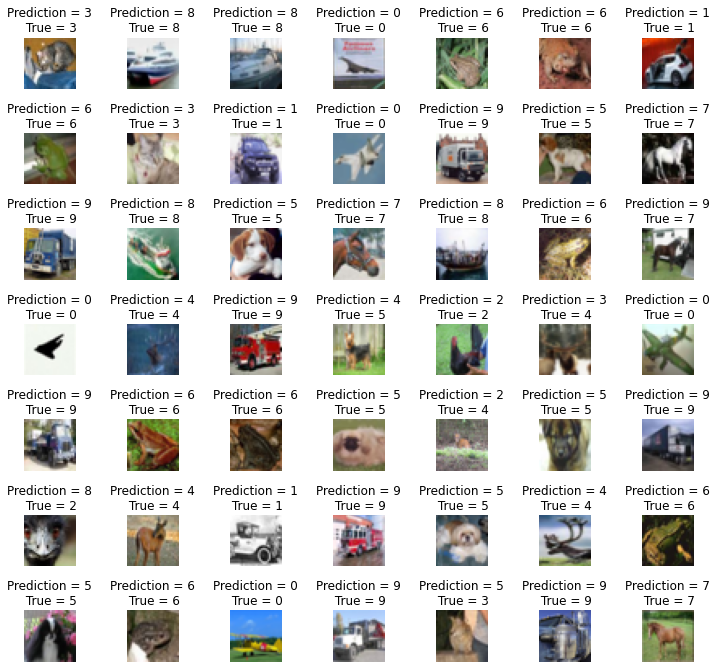

In [29]:
# creating a matrix to visualize predicted and true data
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(classes_x[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

<AxesSubplot:>

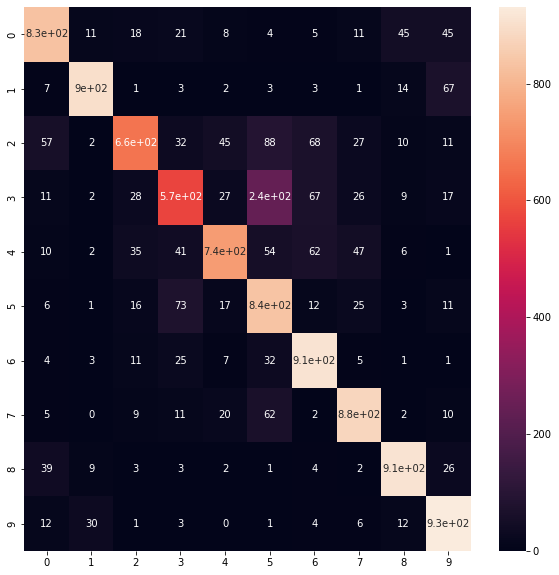

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, classes_x)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# Building the model with Data Augmentation

In [31]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [32]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [33]:
X_train.shape

(50000, 32, 32, 3)

In [34]:
number_cat = 10
y_train = to_categorical(y_train, number_cat)
y_test = to_categorical(y_test, number_cat)

In [35]:
X_train = X_train/255
X_test = X_test/255

In [36]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=90,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(X_train)

In [38]:
reg=None
adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=reg, input_shape=(Input_shape),padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(32, (3, 3), activation='relu',kernel_regularizer=reg,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model2.add(Dropout(drop_conv))

model2.add(Conv2D(2*32, (3, 3), activation='relu',kernel_regularizer=reg,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(2*32, (3, 3), activation='relu',kernel_regularizer=reg,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model2.add(Dropout(drop_conv))

model2.add(Conv2D(4*32, (3, 3), activation='relu',kernel_regularizer=reg,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(4*32, (3, 3), activation='relu',kernel_regularizer=reg,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model2.add(Dropout(drop_conv))

model2.add(Flatten())
model2.add(Dense(512, activation='relu',kernel_regularizer=reg))
model2.add(BatchNormalization())
model2.add(Dropout(drop_dense))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)

/Users/jeeveshdhingra/ML/env/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [39]:
model2.fit_generator(datagen.flow(X_train, y_train, batch_size = 128), epochs = 10)

/var/folders/zj/xdzqwkkx6658f2k740942m5r0000gn/T/ipykernel_8198/3508347145.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2.fit_generator(datagen.flow(X_train, y_train, batch_size = 128), epochs = 10)


Epoch 1/10


2022-01-21 16:45:37.064712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


391/391 [==============================] - 19s 47ms/step - loss: 1.9365 - accuracy: 0.3623
Epoch 2/10
391/391 [==============================] - 18s 47ms/step - loss: 1.4539 - accuracy: 0.4848
Epoch 3/10
391/391 [==============================] - 18s 47ms/step - loss: 1.2617 - accuracy: 0.5487
Epoch 4/10
391/391 [==============================] - 18s 47ms/step - loss: 1.1531 - accuracy: 0.5902
Epoch 5/10
391/391 [==============================] - 19s 47ms/step - loss: 1.0835 - accuracy: 0.6179
Epoch 6/10
391/391 [==============================] - 19s 48ms/step - loss: 1.0124 - accuracy: 0.6430
Epoch 7/10
391/391 [==============================] - 19s 49ms/step - loss: 0.9752 - accuracy: 0.6610
Epoch 8/10
391/391 [==============================] - 20s 51ms/step - loss: 0.9320 - accuracy: 0.6725
Epoch 9/10
391/391 [==============================] - 19s 49ms/step - loss: 0.8966 - accuracy: 0.6899
Epoch 10/10
391/391 [==============================] - 20s 50ms/step - loss: 0.8575 - accurac

In [40]:
evaluation2 = model2.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation2[1]))

 13/313 [>.............................] - ETA: 2s - loss: 1.0049 - accuracy: 0.6394

2022-01-21 16:48:46.141735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 10ms/step - loss: 1.0182 - accuracy: 0.6587
Test Accuracy: 0.6587000489234924


In [41]:
predicted_classes = model2.predict(X_test) 
classes_x=np.argmax(predicted_classes,axis=1)

2022-01-21 16:48:49.550330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [42]:
classes_x

array([3, 8, 8, ..., 5, 1, 7])

In [43]:
y_test = y_test.argmax(1) #go back from binary to numbers
y_test

array([3, 8, 8, ..., 5, 1, 7])

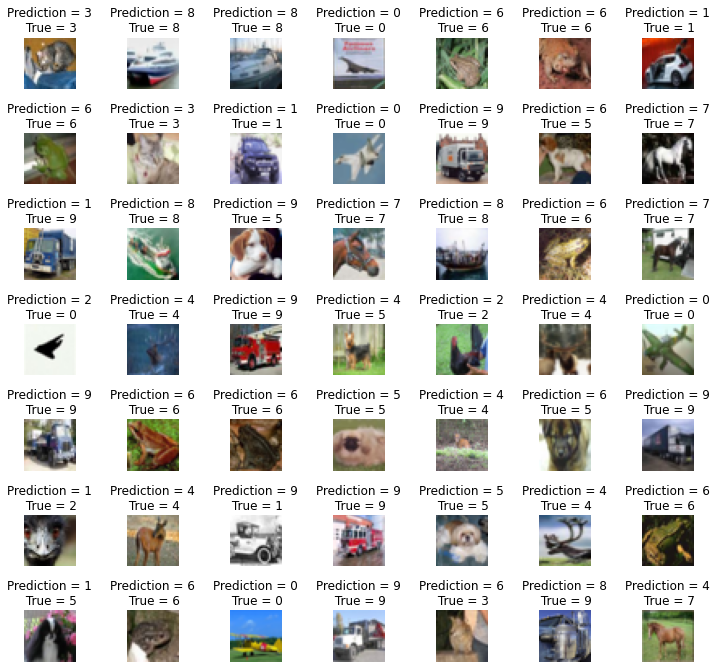

In [44]:
# creating a matrix to visualize predicted and true data
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(classes_x[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

<AxesSubplot:>

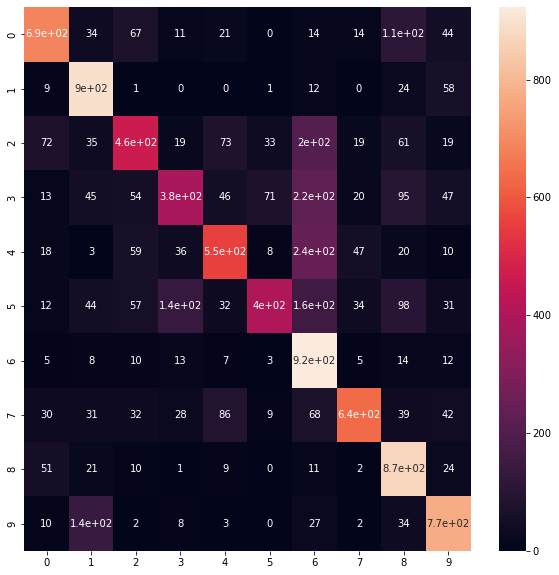

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, classes_x)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)